# Project1- Analysis of Human Induced Earthquakes

In [888]:
#Importing Dependencies
import warnings
warnings.filterwarnings('ignore')
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats



# Converting .csv file into a dataframe

In [889]:
#Source of .csv file
eq_file = 'Resources/The_Human_Induced_Earthquake_Database - HiQuake.csv'

#Reading the .csv file
original_hi_df = pd.read_csv(eq_file)

#Displaying top 5 rows from the dataframe
original_hi_df.head()


,Country,Earthquake cause (main class),Earthquake cause (subclass),Project name,Latitude (approximate),Longitude (approximate),Project start date,Project end date,Seismicity or monitoring start date,Seismicity or monitoring end date,...,Maximum injection/extraction rate (max unless stated),Rate units,Total volume or mass of material injected/extracted,Volume or mass units,Maximum injection pressure (MPa),Change in reservoir pressure (MPa),Stress change (MPa),Bottom hole temperature (°C),Notes,Reference(s)
0,Algeria,CCS,CO2 injection,In Salah,29.088942,2.213826,2004,NaN,2009 (August),2011 (June),...,43,mcf/day,"3850000 (as of 2013), 3500000 (m3)",tonnes,16,12 (modelled),NaN,NaN,Injection into gas field but no apparent conne...,"Oye et al. (2013), Stork et al. (2015), Verdon..."
1,USA,CCS,CO2 injection,"Decatur, Illinois, demonstration site",39.876933,-88.89336,2011 (November),2014 (November),2013 (July),2014 (December),...,11.6,kg/s,"1000000, 910000 (m3)",tonnes,NaN,NaN,NaN,NaN,Volume assuming liquid CO2 density of 1100 kg/m3,Kaven et al. (2015)
2,Botswana,Coal Bed Methane (CBM),Coal Bed Methane (CBM),Selemo and Lesedi pilot pods,-22.586373,25.84591,2014,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albano et al. (2017) provide strong evidence f...,Barbee (2017)
3,UK,Construction,Coastal engineering (geoengineering),Folkestone,51.104297,1.271382,1806,NaN,NaN,NaN,...,NaN,NaN,2800000000,kg,NaN,NaN,0.001-0.03,NaN,Samphire Hoe a much more likely trigger as lar...,Klose (2007a)
4,Taiwan,Construction,Construction,Taipei 101,25.033985,121.56442,NaN,NaN,NaN,NaN,...,NaN,NaN,258138 (proxy),NaN,NaN,NaN,0.47,NaN,Assume steel density of 8000 kg/m3,Lin (2005)


# Selecting the columns for analysis

In [890]:
#Selecting the columns for analysis
hin_df = original_hi_df[["Country","Earthquake cause (main class)","Project name","Latitude (approximate)","Longitude (approximate)","Year of Mmax","Observed maximum magnitude (Mmax)"]]

hin_df.head()

,Country,Earthquake cause (main class),Project name,Latitude (approximate),Longitude (approximate),Year of Mmax,Observed maximum magnitude (Mmax)
0,Algeria,CCS,In Salah,29.088942,2.213826,NaN,1.70
1,USA,CCS,"Decatur, Illinois, demonstration site",39.876933,-88.89336,NaN,1.26
2,Botswana,Coal Bed Methane (CBM),Selemo and Lesedi pilot pods,-22.586373,25.84591,2017.0,6.30
3,UK,Construction,Folkestone,51.104297,1.271382,2007.0,4.20
4,Taiwan,Construction,Taipei 101,25.033985,121.56442,2004.0,3.80


# Visualizing the global distribution of the causes of Human Induced Earthquakes


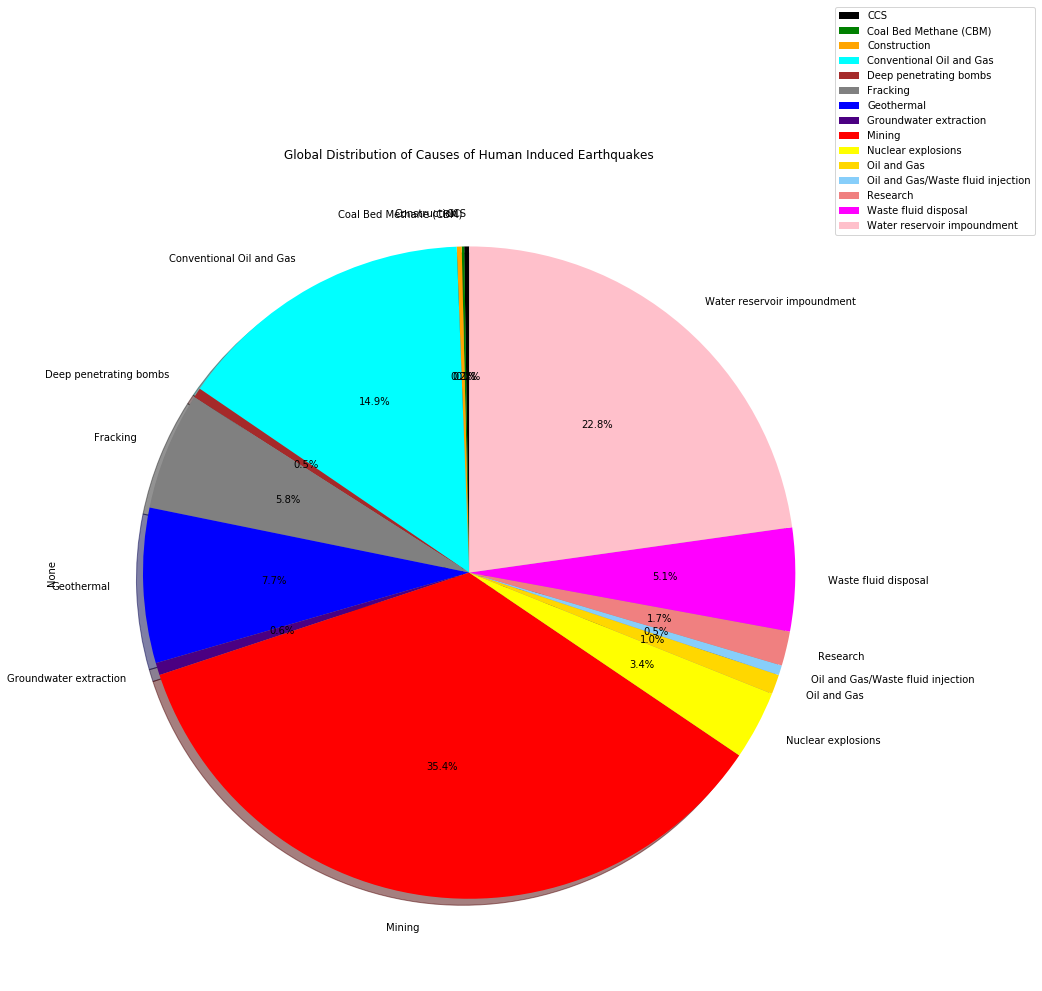

In [891]:
#Visualizing the global distribution of the Human Induced Earthquakes
colors = ("black", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "red", "yellow","gold", "lightskyblue","lightcoral","magenta", "pink")

#Plotting a pie chart from the derived values
tot_cause_count = hin_df.groupby(["Earthquake cause (main class)"]).size().plot(kind='pie',figsize=(15,15),startangle=90,colors=colors,autopct='%1.1f%%', shadow=True)

#Setting legend
tot_cause_count.legend(loc='best', bbox_to_anchor=(1.2,1.2))

#Setting the plot title
tot_cause_count.set_title('Global Distribution of Causes of Human Induced Earthquakes')

#Save the plot to .png file
plt.savefig("Images/GlobalDistribution.png")

# Picking top 5 countries by number of earthquake events and comparing with different causes

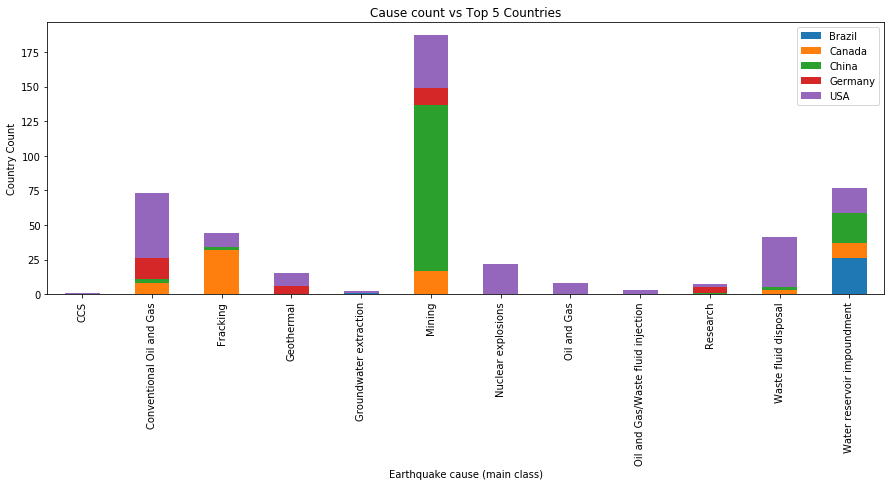

In [892]:
#Picking top 5 countries by number of earthquake events
top_countries = hin_df.groupby(["Country"]).count().nlargest(5, "Project name").index.get_level_values(0).tolist()

#Deriving data for top 8 countries 
top_country_df = hin_df[hin_df["Country"].isin(top_countries)]

#Plotting a stacked bar chart from the derived values
country_count = top_country_df.groupby(["Earthquake cause (main class)", "Country"])['Project name'].size().unstack().plot(
    kind='bar',stacked=True, figsize=(15,5))

#Setting legend
country_count.legend(loc='best', bbox_to_anchor=(1,1))

#Setting the y label
country_count.set_ylabel('Country Count')

#Setting the plot title
country_count.set_title('Cause count vs Top 5 Countries')

#Save the plot to .png file
plt.savefig("Images/Top5countries.png")


# Trends of Top 5 causes vs Number of Earthquake events

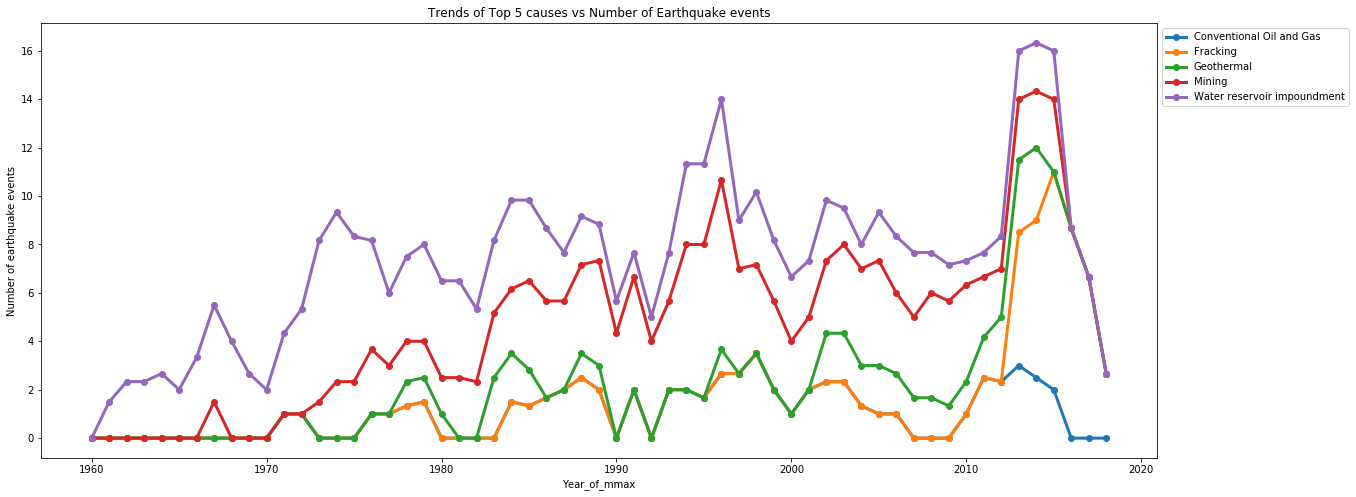

In [893]:
#Picking top 5 reasons by number of earthquake events
year_hin_df=hin_df.dropna(how='any')
top_reasons = year_hin_df.groupby(["Earthquake cause (main class)"]).count().nlargest(5, "Project name").index.get_level_values(0).tolist()
top_reasons_df = year_hin_df[year_hin_df["Earthquake cause (main class)"].isin(top_reasons)]

#Renaming the year column for easier sorting
years_hin_df=top_reasons_df.rename(columns={'Year of Mmax':'Year_of_mmax'})
nus_years_hin_df=years_hin_df[(years_hin_df.Year_of_mmax>=1960.0)]

#occurence_df = nus_years_hin_df.groupby(["Year_of_mmax", "Earthquake cause (main class)"])['Country'].size().unstack().plot(
#    kind='line',stacked=True, figsize=(20,20),linewidth=3)
#occurence_df.legend(loc='best', bbox_to_anchor=(1,1))

#Plotting a line chart from the derived values
trend_plot = nus_years_hin_df.groupby(["Year_of_mmax", "Earthquake cause (main class)"])['Country'].size().unstack().rolling(window=3, min_periods=2).mean().plot(
    kind='line',marker ='o',stacked=True, figsize=(20,8),linewidth=3)

#Setting legend
trend_plot.legend(loc='best', bbox_to_anchor=(1,1))

#Setting the y label
trend_plot.set_ylabel('Number of earthquake events')

#Setting the plot title
trend_plot.set_title('Trends of Top 5 causes vs Number of Earthquake events')

#Save the plot to .png file
plt.savefig("Images/Causetrend.png")

# Comparing the Earthquake Causes vs Earthquake Magnitude 

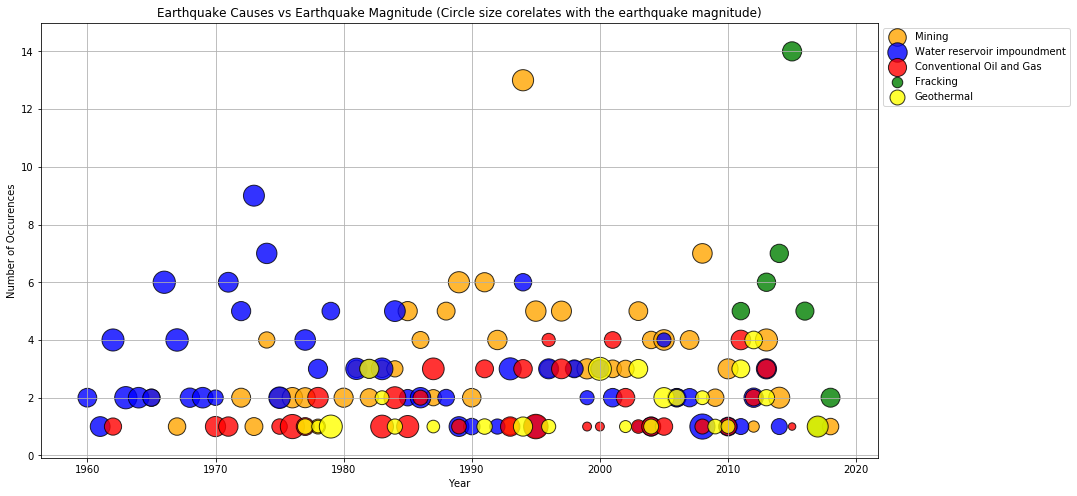

In [894]:
#Picking top 5 reasons by number of earthquake events
top_reasons = nus_years_hin_df.groupby(["Earthquake cause (main class)"]).count().nlargest(5, "Observed maximum magnitude (Mmax)").index.get_level_values(0).tolist()
top_mag_df = nus_years_hin_df[year_hin_df["Earthquake cause (main class)"].isin(top_reasons)]

#Defining colors for the bubbles
colors=["orange","blue","red","green","yellow"]

#Defining the scatter plot size
plt.figure(figsize=(15,8))

index = 0
#Canvassing the scatter plot for each reason comparing its magnitude
for reason in top_reasons:
    filter_data = top_mag_df[top_mag_df["Earthquake cause (main class)"].isin([reason])]
    mag=filter_data.groupby(["Year_of_mmax", "Earthquake cause (main class)"]).max()['Observed maximum magnitude (Mmax)'].tolist()
    bubble_size=[x*80 for x in mag]
    years=filter_data.groupby(["Year_of_mmax"]).max().index.get_level_values(0).tolist()
    occurence=filter_data.groupby(["Year_of_mmax"]).count()['Country'].tolist()
    plt.scatter(years, occurence, s=bubble_size, c=colors[index], alpha = 0.8, edgecolors = "black",label=reason);
    index = index + 1


# Incorporate the other graph properties
plt.title("Earthquake Causes vs Earthquake Magnitude (Circle size corelates with the earthquake magnitude)")
plt.xlabel("Year")
plt.ylabel("Number of Occurences")
plt.grid()
# Create a legend
plt.legend(loc='best', bbox_to_anchor=(1,1))    

#Save the plot to .png file
plt.savefig("Images/CausevsMagnitude.png")


# Null Hypothesis: There is no significant difference between the number of earthquakes caused by Mining and Water Reservoir Impoundment



In [895]:
top_causes = hin_df.groupby(['Earthquake cause (main class)']).count().nlargest(2, "Project name").index.get_level_values(0).tolist()
#top_countries = hin_df.groupby(['Country']).count().nlargest(10, "Project name").index.get_level_values(0).tolist()

cause_df = hin_df[hin_df["Earthquake cause (main class)"].isin(top_causes)]

# Calculate earthquake frequency for top 2 activities -
# ('Mining', 'Water reservoir impoundment')
# for each country
activity1 = cause_df[cause_df['Earthquake cause (main class)'] == top_causes[0]].groupby('Year of Mmax').count()['Project name']
activity2 = cause_df[cause_df['Earthquake cause (main class)'] == top_causes[1]].groupby('Year of Mmax').count()['Project name']

mean_1=activity1.mean() 
mean_2=activity2.mean()

print(f"Mean of Mining ={mean_1}")
print(f"Mean of Water reservoir impoundment ={mean_2}")


Mean of Mining =3.0555555555555554
Mean of Water reservoir impoundment =2.6545454545454548


In [896]:
# The hypothesis is proven
stats.f_oneway(activity1, activity2)

F_onewayResult(statistic=1.020837375168213, pvalue=0.31459980625836836)

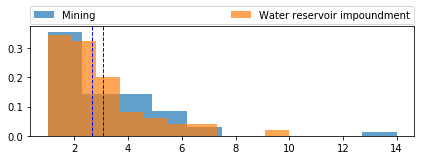

In [897]:
# Histogram Plot of Cause and Count/Frequency of the earthquakes
plt.subplot(2,1,2)
plt.hist(activity1, 10, density=True, alpha=0.7, label="Mining")
plt.hist(activity2, 10, density=True, alpha=0.7, label="Water reservoir impoundment")

plt.axvline(activity1.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(activity2.mean(), color='b', linestyle='dashed', linewidth=1)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.) 
plt.tight_layout()

#Save the plot to .png file
plt.savefig("Images/Stats.png")

# The hypothesis is that there is a significant difference between number of earthquakes caused by Mining and Water Reservoir Impoundment
